In [1]:
import torch
import torchvision

import torch.nn as nn
from torch.utils.data import Dataset,DataLoader,TensorDataset
import torch.optim as optim
from torchsummary import summary
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.colors as mcolors

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
gpu = torch.device("cuda" if torch.cuda.is_available() else "cpu")

C:\Users\posin\anaconda3\envs\pytorch\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.metrics import mean_squared_error
y_true = [30.9,25.9]
y_pred = [45.0,25.0]
print(mean_squared_error(y_true, y_pred))
value =0
for i in range(len(y_true)):
    value+=(y_true[i]-y_pred[i])**2
print(value/len(y_true))



99.81000000000002
99.81000000000002


In [3]:
AAPL=pd.read_csv('HSBC.csv',index_col="Date",parse_dates=True,infer_datetime_format=True)
print(AAPL.info())

AAPL['NextPrice'] = AAPL['Adj Close'].shift(-1)
AAPL.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5212 entries, 1999-07-16 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5212 non-null   float64
 1   High       5212 non-null   float64
 2   Low        5212 non-null   float64
 3   Close      5212 non-null   float64
 4   Adj Close  5212 non-null   float64
 5   Volume     5212 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 285.0 KB
None


,Open,High,Low,Close,Adj Close,Volume,NextPrice
count,5212.000000,5212.000000,5212.000000,5212.000000,5212.000000,5.212000e+03,5211.000000
mean,58.113921,58.494135,57.747422,58.143824,32.978647,1.544096e+06,32.980640
std,16.863844,16.934121,16.804597,16.869297,7.406053,1.516677e+06,7.405365
min,22.920000,24.450001,22.889999,23.590000,13.067957,1.950000e+04,13.067957
25%,44.957500,45.257499,44.695001,44.950001,26.418838,4.106500e+05,26.440072
50%,54.290001,54.689999,53.933750,54.330002,33.294323,1.278150e+06,33.297123
75%,72.412502,73.270002,71.910004,72.672503,38.019252,2.112275e+06,38.019400
max,98.919998,99.519997,98.160004,99.519997,51.184448,1.680740e+07,51.184448


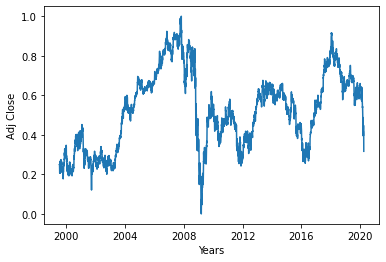

In [4]:
get = AAPL
get['Adj Close']= minmax.fit_transform(get['Adj Close'].values.reshape(-1,1))
plt.plot(get.index,get['Adj Close'])
plt.xlabel('Years')
plt.ylabel('Adj Close')
plt.savefig('Adj_close.png')

In [5]:
AAPL
print(np.sum(AAPL.isnull()))
AAPL=AAPL.dropna()
AAPL = AAPL.astype(np.float32)
print(np.sum(AAPL.isnull()))

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
NextPrice    1
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
NextPrice    0
dtype: int64


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5211 entries, 1999-07-16 to 2020-03-31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5211 non-null   float32
 1   High       5211 non-null   float32
 2   Low        5211 non-null   float32
 3   Close      5211 non-null   float32
 4   Adj Close  5211 non-null   float32
 5   Volume     5211 non-null   float32
 6   NextPrice  5211 non-null   float32
dtypes: float32(7)
memory usage: 183.2 KB


In [7]:
AAPL

,Open,High,Low,Close,Adj Close,Volume,NextPrice
Date,,,,,,,
1999-07-16,62.125000,62.312500,61.625000,62.062500,0.249880,231400.0,22.638008
1999-07-19,63.625000,63.687500,61.500000,62.187500,0.251074,158200.0,22.160231
1999-07-20,61.750000,61.750000,60.750000,60.875000,0.238539,79400.0,22.205730
1999-07-21,60.875000,61.187500,60.375000,61.000000,0.239733,75200.0,22.160231
1999-07-22,60.937500,61.000000,60.625000,60.875000,0.238539,33500.0,20.954384
...,...,...,...,...,...,...,...
2020-03-25,29.469999,30.420000,29.080000,29.700001,0.436348,7512700.0,30.129999
2020-03-26,29.299999,30.209999,29.219999,30.129999,0.447629,7979500.0,28.870001
2020-03-27,28.820000,29.500000,28.559999,28.870001,0.414572,6997500.0,28.860001


<AxesSubplot:xlabel='Date'>

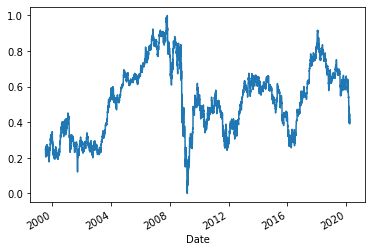

In [8]:
AAPL['Adj Close'].plot()

In [9]:
AAPL.iloc[0:7,0:0]

""
Date
1999-07-16
1999-07-19
1999-07-20
1999-07-21
1999-07-22
1999-07-23
1999-07-26


In [10]:
def splitData (lookback):
    AAPL['Adj Close'] = minmax.fit_transform(AAPL['Adj Close'].values.reshape(-1,1))
    data_raw = AAPL['Adj Close'].to_numpy().reshape(-1,1)
    Len = len(data_raw)
    print(Len)
    VALIDIDX=int(Len*0.6)
    TESTIDX = VALIDIDX+int(Len*0.2)
    
    data=[]
    for i in range(Len - lookback):

        data.append(data_raw[i:i+lookback,])
    
    data=np.array(data)
    Len = data.shape[0]
    VALIDIDX=int(Len*0.6)
    TESTIDX = VALIDIDX+int(Len*0.2)
    train_x, train_y = data[:VALIDIDX,:-1,:],data[:VALIDIDX,-1,:] #train_x = (len(data),lookback-1,1) train_y = (len(data),1)
    valid_x, valid_y = data[VALIDIDX:TESTIDX,:-1,:],data[VALIDIDX:TESTIDX,-1,:]
    test_x,  test_y  = data[TESTIDX:,:-1,:],data[TESTIDX:,-1,:]
    
            
    return train_x, train_y,valid_x, valid_y,test_x,  test_y

In [11]:
class StockData:
    def __init__(self,x,y):
        
        self.x = torch.tensor(x)
        self.y = torch.tensor(y)
        self.len = len(x)
        
    def __getitem__(self,rows):
        return self.x[rows],self.y[rows]
    
    def __len__(self):
        return self.len

In [12]:
class Data():
    def __init__(self,inputx,inputy):
        
        self.x = torch.tensor(inputx)
        self.y = torch.tensor(inputy)
        self.len = len(self.x)
        
    def __getitem__(self,rows):
        return self.x[rows],self.y[rows]
    
    def __len__(self):
        return self.len

In [13]:
class rnn(nn.Module):
    def __init__(self,input_size,hidden_size,num_layer,dropout=0,output=1):
        super(rnn,self).__init__()
        
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.num_layer = num_layer
        
        self.Rnn = nn.RNN(self.input_size,self.hidden_size,self.num_layer,batch_first = True,dropout =0)
        self.fcn = nn.Linear(self.hidden_size,1)
        
    
    def forward(self,x):
        x,states =self.Rnn(x)
        out = self.fcn(states[-1])
        return out

In [14]:
class rnn2(nn.Module):
    def __init__(self,input_size,hidden_size,num_layer,output=1):
        super(rnn2,self).__init__()
        
        self.hidden_size = hidden_size
        self.input_size = input_size
        self.num_layer = num_layer
        
        self.Rnn = nn.RNN(self.input_size,self.hidden_size,self.num_layer,batch_first = True)
        self.fcn = nn.Linear(self.hidden_size,1)
        
    
    def forward(self,x):
        x,states =self.Rnn(x)
        out = self.fcn(states[-1])
        return out

In [15]:
def plotcompare(store):
    color =['b','g','r','c','m','y','k']
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
    for i in range(len(store)):
        ax[0].plot(np.arange(0,store[i]['epoch']),store[i]['train'],label=f"{store[i]['name']} Train Loss",color=color[i])
        ax[1].plot(np.arange(0,store[i]['epoch']),store[i]['valid'],label=f"{store[i]['name']} Valid Loss",color=color[i])

    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Train Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Valid Loss')
#     plt.suptitle(f'{len(store)} models comparion')
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
#     plt.savefig('compare.png')
    plt.show()

In [16]:
def training(hidden,num_layer,epoch,lr,train_load,valid_load,dropout=0,input=1):
    if dropout==0:
        Rnn=rnn2(input,hidden,num_layer).to(gpu)
    else:
        Rnn = rnn(input,hidden,num_layer,dropout=dropout).to(gpu)
    criterion = nn.MSELoss(reduction='mean')
    optimizer = torch.optim.SGD(Rnn.parameters(), lr=lr)
    
    save ={'train':[],'valid':[],'name':'','epoch':epoch,'layer':0,'dropout':0,'hidden':0}
    for i in range(epoch):
        
        train_loss =0.0
        valid_loss =0.0
        for k, data in enumerate(train_loader):
            train_x,train_y = data
            
            train_x = train_x.to(gpu)
            train_y = train_y.to(gpu)
            
#             train_y=torch.unsqueeze(train_y, 0)
            optimizer.zero_grad()
            train_pred = Rnn(train_x)
            
            loss = criterion(train_pred, train_y)
            train_loss+=loss.item()
#             if i %100 ==0:
                
            loss.backward()
            optimizer.step()
        
        with torch.no_grad():
            for k, data in enumerate(valid_loader):
                valid_x,valid_y = data
                
                valid_x = valid_x.to(gpu)
                valid_y = valid_y.to(gpu)
#                 valid_y=torch.unsqueeze(valid_y, 0)
                valid_pred = Rnn(valid_x)
                
                
                
                loss = criterion(valid_pred, valid_y)
                valid_loss+=loss.item()
#         torch.save(Rnn, 'model.pth')     
        print(f'Epoch:{i+1:2d}/{epoch:2d}: | Train Loss: {train_loss:.4f} | Val Loss: {valid_loss:.4f}')
        save['train'].append(train_loss)
        save['valid'].append(valid_loss)
        save['layer']=num_layer
        save['dropout']=dropout
        save['hidden']=hidden
        save['name'] = f'rnn_{hidden}_{num_layer}_{lr}_{dropout}'
    return save

In [17]:
def multiday_signleplot(input):
    color =['b','r','c','m','y','k','g']
    for i in range(len(input)):
        plt.plot(np.arange(0,input[i]['epoch']),input[i]['valid'],label=f"Layer = {input[i]['layer']}, dropout = {input[i]['dropout']}",color=color[i])
    plt.xlabel('Epoch')
    plt.ylabel('Valid Loss')
    plt.legend()
    plt.grid()
    plt.savefig('Layerchange.png')
    plt.show()

5211
(3120, 10, 1) (3120, 1) (1040, 10, 1) (1040, 1) (1040, 10, 1) (1040, 1)
Epoch: 1/50: | Train Loss: 1.5279 | Val Loss: 0.1236
Epoch: 2/50: | Train Loss: 1.4842 | Val Loss: 0.1163
Epoch: 3/50: | Train Loss: 1.4363 | Val Loss: 0.1115
Epoch: 4/50: | Train Loss: 1.3840 | Val Loss: 0.1072
Epoch: 5/50: | Train Loss: 1.3308 | Val Loss: 0.1030
Epoch: 6/50: | Train Loss: 1.2776 | Val Loss: 0.0989
Epoch: 7/50: | Train Loss: 1.2241 | Val Loss: 0.0947
Epoch: 8/50: | Train Loss: 1.1705 | Val Loss: 0.0904
Epoch: 9/50: | Train Loss: 1.1163 | Val Loss: 0.0862
Epoch:10/50: | Train Loss: 1.0615 | Val Loss: 0.0819
Epoch:11/50: | Train Loss: 1.0058 | Val Loss: 0.0775
Epoch:12/50: | Train Loss: 0.9493 | Val Loss: 0.0731
Epoch:13/50: | Train Loss: 0.8918 | Val Loss: 0.0686
Epoch:14/50: | Train Loss: 0.8336 | Val Loss: 0.0640
Epoch:15/50: | Train Loss: 0.7744 | Val Loss: 0.0594
Epoch:16/50: | Train Loss: 0.7146 | Val Loss: 0.0547
Epoch:17/50: | Train Loss: 0.6544 | Val Loss: 0.0500
Epoch:18/50: | Train L

Epoch: 5/50: | Train Loss: 1.3132 | Val Loss: 0.1100
Epoch: 6/50: | Train Loss: 1.3067 | Val Loss: 0.1096
Epoch: 7/50: | Train Loss: 1.2995 | Val Loss: 0.1091
Epoch: 8/50: | Train Loss: 1.2924 | Val Loss: 0.1086
Epoch: 9/50: | Train Loss: 1.2846 | Val Loss: 0.1081
Epoch:10/50: | Train Loss: 1.2764 | Val Loss: 0.1075
Epoch:11/50: | Train Loss: 1.2680 | Val Loss: 0.1069
Epoch:12/50: | Train Loss: 1.2590 | Val Loss: 0.1063
Epoch:13/50: | Train Loss: 1.2495 | Val Loss: 0.1057
Epoch:14/50: | Train Loss: 1.2394 | Val Loss: 0.1050
Epoch:15/50: | Train Loss: 1.2291 | Val Loss: 0.1043
Epoch:16/50: | Train Loss: 1.2180 | Val Loss: 0.1036
Epoch:17/50: | Train Loss: 1.2063 | Val Loss: 0.1028
Epoch:18/50: | Train Loss: 1.1941 | Val Loss: 0.1020
Epoch:19/50: | Train Loss: 1.1809 | Val Loss: 0.1012
Epoch:20/50: | Train Loss: 1.1672 | Val Loss: 0.1002
Epoch:21/50: | Train Loss: 1.1524 | Val Loss: 0.0993
Epoch:22/50: | Train Loss: 1.1368 | Val Loss: 0.0983
Epoch:23/50: | Train Loss: 1.1203 | Val Loss: 

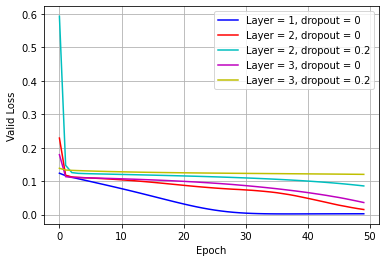

In [18]:
train_x, train_y,valid_x, valid_y,test_x, test_y=splitData(11)
print(train_x.shape,train_y.shape,valid_x.shape, valid_y.shape,test_x.shape, test_y.shape)
train_set = StockData(train_x,train_y)
valid_set = StockData(valid_x,valid_y)
test_set = StockData(test_x,test_y)

train_loader = DataLoader(dataset = train_set,batch_size = 100, shuffle = False)
valid_loader = DataLoader(dataset = valid_set,batch_size = 100, shuffle = False)
test_loader = DataLoader(dataset = test_set,batch_size = 100, shuffle = False)

tempstore =[]
for i in range(1,4):
    for rate in [0,0.2]:
        if i==1:
            if rate ==0:
                datastore =training(5,i,50,0.01,train_loader,valid_loader)
                tempstore.append(datastore)
        else:
            if i ==2 and rate ==0:
                print('here')
            datastore =training(5,i,50,0.01,train_loader,valid_loader,dropout=rate)
            tempstore.append(datastore)

# datastore1 = training(16,1,100,0.01,train_loader,valid_loader)
# datastore2 = training(16,1,100,0.1,train_loader,valid_loader)
# datastore3 = training(32,1,100,0.1,train_loader,valid_loader)
# datastore4 = training(64,1,100,0.1,train_loader,valid_loader)
# plotcompare([datastore])
# plotcompare([datastore])
# signleplot(datastore)
multiday_signleplot(tempstore)

In [19]:
def mult_shiddenleplot(input):
    color =['b','r','c','m','y','k','g']
    for i in range(len(input)):
        plt.plot(np.arange(0,input[i]['epoch']),input[i]['valid'],label=f"Hidden state = {input[i]['hidden']}",color=color[i])
    plt.xlabel('Epoch')
    plt.ylabel('Valid Loss')
    plt.legend()
    plt.grid()
    plt.savefig('changeHidden.png')
    plt.show()

5211
Epoch: 1/50: | Train Loss: 12.5227 | Val Loss: 1.6060
Epoch: 2/50: | Train Loss: 3.1494 | Val Loss: 0.3882
Epoch: 3/50: | Train Loss: 1.7971 | Val Loss: 0.1831
Epoch: 4/50: | Train Loss: 1.6370 | Val Loss: 0.1450
Epoch: 5/50: | Train Loss: 1.6285 | Val Loss: 0.1363
Epoch: 6/50: | Train Loss: 1.6316 | Val Loss: 0.1337
Epoch: 7/50: | Train Loss: 1.6325 | Val Loss: 0.1328
Epoch: 8/50: | Train Loss: 1.6316 | Val Loss: 0.1323
Epoch: 9/50: | Train Loss: 1.6299 | Val Loss: 0.1320
Epoch:10/50: | Train Loss: 1.6279 | Val Loss: 0.1318
Epoch:11/50: | Train Loss: 1.6259 | Val Loss: 0.1316
Epoch:12/50: | Train Loss: 1.6239 | Val Loss: 0.1314
Epoch:13/50: | Train Loss: 1.6219 | Val Loss: 0.1312
Epoch:14/50: | Train Loss: 1.6199 | Val Loss: 0.1311
Epoch:15/50: | Train Loss: 1.6180 | Val Loss: 0.1309
Epoch:16/50: | Train Loss: 1.6162 | Val Loss: 0.1307
Epoch:17/50: | Train Loss: 1.6144 | Val Loss: 0.1306
Epoch:18/50: | Train Loss: 1.6126 | Val Loss: 0.1304
Epoch:19/50: | Train Loss: 1.6110 | Val 

Epoch: 8/50: | Train Loss: 0.9250 | Val Loss: 0.0808
Epoch: 9/50: | Train Loss: 0.8859 | Val Loss: 0.0775
Epoch:10/50: | Train Loss: 0.8471 | Val Loss: 0.0741
Epoch:11/50: | Train Loss: 0.8086 | Val Loss: 0.0708
Epoch:12/50: | Train Loss: 0.7704 | Val Loss: 0.0676
Epoch:13/50: | Train Loss: 0.7324 | Val Loss: 0.0643
Epoch:14/50: | Train Loss: 0.6946 | Val Loss: 0.0612
Epoch:15/50: | Train Loss: 0.6570 | Val Loss: 0.0580
Epoch:16/50: | Train Loss: 0.6197 | Val Loss: 0.0549
Epoch:17/50: | Train Loss: 0.5828 | Val Loss: 0.0518
Epoch:18/50: | Train Loss: 0.5462 | Val Loss: 0.0488
Epoch:19/50: | Train Loss: 0.5101 | Val Loss: 0.0458
Epoch:20/50: | Train Loss: 0.4746 | Val Loss: 0.0428
Epoch:21/50: | Train Loss: 0.4398 | Val Loss: 0.0399
Epoch:22/50: | Train Loss: 0.4057 | Val Loss: 0.0371
Epoch:23/50: | Train Loss: 0.3726 | Val Loss: 0.0343
Epoch:24/50: | Train Loss: 0.3406 | Val Loss: 0.0316
Epoch:25/50: | Train Loss: 0.3098 | Val Loss: 0.0291
Epoch:26/50: | Train Loss: 0.2803 | Val Loss: 

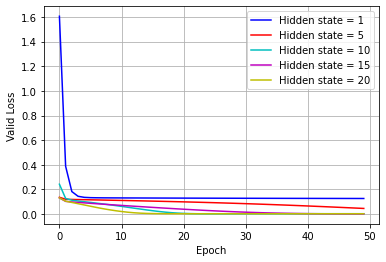

In [20]:

train_x, train_y,valid_x, valid_y,test_x, test_y=splitData(11)
train_set = StockData(train_x,train_y)
valid_set = StockData(valid_x,valid_y)
test_set = StockData(test_x,test_y)

train_loader = DataLoader(dataset = train_set,batch_size = 100, shuffle = False)
valid_loader = DataLoader(dataset = valid_set,batch_size = 100, shuffle = False)
test_loader = DataLoader(dataset = test_set,batch_size = 100, shuffle = False)
tempstore =[]
for i in [1,5,10,15,20]:
    datastore =training(i,1,50,0.01,train_loader,valid_loader)
    tempstore.append(datastore)
mult_shiddenleplot(tempstore)

In [21]:
AAPL.index

DatetimeIndex(['1999-07-16', '1999-07-19', '1999-07-20', '1999-07-21',
               '1999-07-22', '1999-07-23', '1999-07-26', '1999-07-27',
               '1999-07-28', '1999-07-29',
               ...
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-30', '2020-03-31'],
              dtype='datetime64[ns]', name='Date', length=5211, freq=None)

In [22]:
def unbaisedsplitData (lookback):
    Date =AAPL.index
    AAPL['Adj Close'] = minmax.fit_transform(AAPL['Adj Close'].values.reshape(-1,1))
    data_raw = AAPL['Adj Close'].to_numpy().reshape(-1,1)
    Len = len(data_raw)
    print(Len)
    VALIDIDX=int(Len*0.6)
    TESTIDX = VALIDIDX+int(Len*0.2)
    
    data=[]
    date=[]
    for i in range(Len - lookback):

        data.append(data_raw[i:i+lookback,])
        date.append(Date[i+lookback])
    data=np.array(data)
    Len = data.shape[0]
    VALIDIDX=int(Len*0.6)
    TESTIDX = VALIDIDX+int(Len*0.2)
    train_x, train_y = data[:TESTIDX,:-1,:],data[:TESTIDX,-1,:] #train_x = (len(data),lookback-1,1) train_y = (len(data),1)
    test_x,  test_y  = data[TESTIDX:,:-1,:],data[TESTIDX:,-1,:]
    
            
    return train_x, train_y,test_x,  test_y,date

In [23]:
def unbiasedtraining(hidden,num_layer,epoch,lr,input=1):
    Rnn=rnn2(input,hidden,num_layer).to(gpu)
    criterion = nn.MSELoss(reduction='mean')
    optimizer = torch.optim.SGD(Rnn.parameters(), lr=lr)
    
    save ={'train':[],'valid':[],'name':'','epoch':epoch,'layer':0,'dropout':0,'hidden':0}
    for i in range(epoch):
        
        train_loss =0.0
        valid_loss =0.0
        for k, data in enumerate(train_loader):
            train_x,train_y = data
            
            train_x = train_x.to(gpu)
            train_y = train_y.to(gpu)
            
#             train_y=torch.unsqueeze(train_y, 0)
            optimizer.zero_grad()
            train_pred = Rnn(train_x)
            
            loss = criterion(train_pred, train_y)
            train_loss+=loss.item()
#             if i %100 ==0:
                
            loss.backward()
            optimizer.step()
        torch.save(Rnn, 'model.pth')     
        print(f'Epoch:{i+1:2d}/{epoch:2d}: | Train Loss: {train_loss:.4f} | Val Loss: {valid_loss:.4f}')
        save['train'].append(train_loss)
        save['valid'].append(valid_loss)
        save['layer']=num_layer
        save['hidden']=hidden
        save['name'] = f'rnn_{hidden}_{num_layer}_{lr}'
    return save

In [24]:
train_x,train_y,test_x,test_y ,date= unbaisedsplitData(11)
train_set = StockData(train_x,train_y)
test_set = StockData(test_x,test_y)
train_loader = DataLoader(dataset = train_set,batch_size = 100, shuffle = False)
test_loader = DataLoader(dataset = test_set,batch_size = 100, shuffle = False)

5211


In [25]:
def testing():
    model = torch.load('model.pth')
    answer = []
    pred = []
    with torch.no_grad():
        for i, data in enumerate(test_loader):
            test_x,test_y = data
            for i in test_y:
                answer.append(i[0].item())
            test_x = test_x.to(gpu)
            test_y = test_y.to(gpu)
            
            outputs = model(test_x).data.cpu().numpy()
            for i in outputs:
                pred.append(i[0])

    return answer,pred

In [26]:
temp =unbiasedtraining(50,1,50,0.01)

Epoch: 1/50: | Train Loss: 2.1897 | Val Loss: 0.0000
Epoch: 2/50: | Train Loss: 0.7874 | Val Loss: 0.0000
Epoch: 3/50: | Train Loss: 0.7072 | Val Loss: 0.0000
Epoch: 4/50: | Train Loss: 0.6254 | Val Loss: 0.0000
Epoch: 5/50: | Train Loss: 0.5470 | Val Loss: 0.0000
Epoch: 6/50: | Train Loss: 0.4725 | Val Loss: 0.0000
Epoch: 7/50: | Train Loss: 0.4024 | Val Loss: 0.0000
Epoch: 8/50: | Train Loss: 0.3375 | Val Loss: 0.0000
Epoch: 9/50: | Train Loss: 0.2785 | Val Loss: 0.0000
Epoch:10/50: | Train Loss: 0.2260 | Val Loss: 0.0000
Epoch:11/50: | Train Loss: 0.1804 | Val Loss: 0.0000
Epoch:12/50: | Train Loss: 0.1419 | Val Loss: 0.0000
Epoch:13/50: | Train Loss: 0.1102 | Val Loss: 0.0000
Epoch:14/50: | Train Loss: 0.0849 | Val Loss: 0.0000
Epoch:15/50: | Train Loss: 0.0652 | Val Loss: 0.0000
Epoch:16/50: | Train Loss: 0.0503 | Val Loss: 0.0000
Epoch:17/50: | Train Loss: 0.0393 | Val Loss: 0.0000
Epoch:18/50: | Train Loss: 0.0314 | Val Loss: 0.0000
Epoch:19/50: | Train Loss: 0.0257 | Val Loss: 

In [27]:
def testing():
    model = torch.load('model.pth').to(gpu)
    criterion = nn.MSELoss(reduction='mean')
    
    testloss=0.0
    truth=[]
    pred_d =[]
    with torch.no_grad():
        for k, data in enumerate(test_loader):
            test_x,test_y = data
            for i in test_y.numpy():
                truth.append(i[0])
            test_x = test_x.to(gpu)
            test_y = test_y.to(gpu)
#                 valid_y=torch.unsqueeze(valid_y, 0)
            test_pred = model(test_x)
            pred = test_pred.cpu().data.numpy()
            for i in pred:
                pred_d.append(i[0])
            loss = criterion(test_pred, test_y)
            testloss+=loss.item()
    return  truth,pred_d,testloss
                
truth,pred,test_loss =testing()

In [28]:
test_loss

0.0035245284088887274

In [29]:
def signleplot(truth,pred):
    plt.plot(np.arange(0,len(truth)),truth,label=f"Ground Truth",color='r')
    plt.plot(np.arange(0,len(pred)),pred,label=f"Prediction",color='b')
    plt.xlabel('Sample index')
    plt.ylabel('Adj closing price')
    plt.legend()
    plt.grid()
    plt.savefig('adjclose.png')
    plt.show()

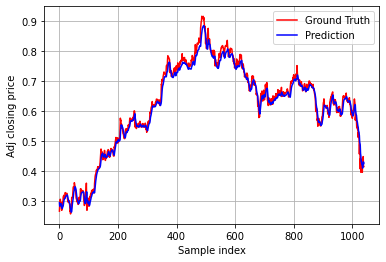

In [30]:
signleplot(truth,pred)